In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-06-15 15:54:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   280MB/s    in 0.3s    

2020-06-15 15:54:58 (280 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-dance/dataset/test.csv
/kaggle/input/hackerearth-dance/dataset/train.csv
/kaggle/input/hackerearth-dance/dataset/test/238.jpg
/kaggle/input/hackerearth-dance/dataset/test/495.jpg
/kaggle/input/hackerearth-dance/dataset/test/64.jpg
/kaggle/input/hackerearth-dance/dataset/test/6.jpg
/kaggle/input/hackerearth-dance/dataset/test/125.jpg
/kaggle/input/hackerearth-dance/dataset/test/226.jpg
/kaggle/input/hackerearth-dance/dataset/test/398.jpg
/kaggle/input/hackerearth-dance/dataset/test/38.jpg
/kaggle/input/hackerearth-dance/dataset/test/349.jpg
/kaggle/input/hackerearth-dance/dataset/test/438.jpg
/kaggle/input/hackerearth-dance/dataset/test/431.jpg
/kaggle/input/hackerearth-dance/dataset/test/286.jpg
/kaggle/input/hackerearth-dance/dataset/test/424.jpg
/kaggle/input/hackerearth-dance/dataset/test/264.jpg
/kaggle/input/hackerearth-dance/dataset/test/292.jpg
/kaggle/input/hackerearth-dance/dataset/test/45.jpg
/kaggle/input/hackerearth-dance/dataset/test/410.jpg
/kagg

/kaggle/input/hackerearth-dance/dataset/train/355.jpg
/kaggle/input/hackerearth-dance/dataset/train/115.jpg
/kaggle/input/hackerearth-dance/dataset/train/403.jpg
/kaggle/input/hackerearth-dance/dataset/train/282.jpg
/kaggle/input/hackerearth-dance/dataset/train/267.jpg
/kaggle/input/hackerearth-dance/dataset/train/103.jpg
/kaggle/input/hackerearth-dance/dataset/train/512.jpg
/kaggle/input/hackerearth-dance/dataset/train/352.jpg
/kaggle/input/hackerearth-dance/dataset/train/191.jpg
/kaggle/input/hackerearth-dance/dataset/train/255.jpg
/kaggle/input/hackerearth-dance/dataset/train/480.jpg
/kaggle/input/hackerearth-dance/dataset/train/25.jpg
/kaggle/input/hackerearth-dance/dataset/train/120.jpg
/kaggle/input/hackerearth-dance/dataset/train/423.jpg
/kaggle/input/hackerearth-dance/dataset/train/304.jpg
/kaggle/input/hackerearth-dance/dataset/train/379.jpg
/kaggle/input/hackerearth-dance/dataset/train/144.jpg
/kaggle/input/hackerearth-dance/dataset/train/184.jpg
/kaggle/input/hackerearth-dan

In [3]:
import os
import csv
from shutil import copyfile

**CREATING DIRECTORIES**

In [4]:

try:
    os.mkdir('/kaggle/hack')
    os.mkdir('/kaggle/hack/training')
    os.mkdir('/kaggle/hack/validation')
    os.mkdir('/kaggle/hack/training/manipuri')
    os.mkdir('/kaggle/hack/training/bharatanatyam')
    os.mkdir('/kaggle/hack/training/odissi')
    os.mkdir('/kaggle/hack/training/kathakali')
    os.mkdir('/kaggle/hack/training/kathak')
    os.mkdir('/kaggle/hack/training/sattriya')
    os.mkdir('/kaggle/hack/training/kuchipudi')
    os.mkdir('/kaggle/hack/training/mohiniyattam')

    os.mkdir('/kaggle/hack/validation/manipuri')
    os.mkdir('/kaggle/hack/validation/bharatanatyam')
    os.mkdir('/kaggle/hack/validation/odissi')
    os.mkdir('/kaggle/hack/validation/kathakali')
    os.mkdir('/kaggle/hack/validation/kathak')
    os.mkdir('/kaggle/hack/validation/sattriya')
    os.mkdir('/kaggle/hack/validation/kuchipudi')
    os.mkdir('/kaggle/hack/validation/mohiniyattam')
    os.mkdir('/kaggle/hack/prediction')
except:
    pass
        

In [5]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

**SPLITTING FILES INTO DIFFERENT DIRECTORIES**

In [6]:
def splitFile(SOURCE, TRAINING,TESTING):
    with open('/kaggle/input/hackerearth-dance/dataset/train.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        i=0
        for row in csv_reader:
            if i==0:
                i=i+1
                continue
            if i<=300:
                copyfile(SOURCE+str(row[0]), TRAINING+str(row[1])+'/'+str(row[0]))
                i=i+1
            else:
                copyfile(SOURCE+str(row[0]),TESTING+str(row[1])+'/'+str(row[0]))
                i=i+1

splitFile('/kaggle/input/hackerearth-dance/dataset/train/', '/kaggle/hack/training/', '/kaggle/hack/validation/')

   
            

In [7]:
def addPrediction(SOURCE, DESTINATION):
    with open('/kaggle/input/hackerearth-dance/dataset/test.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        i=0
        for file in csv_reader:
            if i==0:
                i=i+1
                continue
            copyfile(SOURCE + str(file[0]), DESTINATION+str(file[0]))

addPrediction('/kaggle/input/hackerearth-dance/dataset/test/', '/kaggle/hack/prediction/')

**TRANSFER LEARNING FROM INCEPTIONV3 MODEL**

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [9]:
pre_trained_model = InceptionV3(
    input_shape = (IMG_WIDTH,IMG_HEIGHT,3),
    include_top = False,
    weights = None
)

pre_trained_model.load_weights(local_weights_file)


In [10]:
for layers in pre_trained_model.layers:
    layers.trainable = False
    
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
last_output = pre_trained_model.get_layer('mixed8').output


**MODEL**

In [18]:
from tensorflow.keras import layers

x = layers.Dropout(0.5)(last_output)
x = layers.Flatten()(x)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x=  layers.BatchNormalization()(x)


x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x=  layers.BatchNormalization()(x)



x = layers.Dense(8, activation = 'softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])



**MODEL SUMMARY**

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

**CREATING GENERATORS**

In [20]:
TRAINING_DIR= "/kaggle/hack/training/"

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip=True,
    width_shift_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (IMG_WIDTH,IMG_HEIGHT),
    batch_size = 16,
    class_mode = 'categorical'
)


TESTING_DIR = "/kaggle/hack/validation"

test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    TESTING_DIR,
    target_size = (IMG_WIDTH,IMG_HEIGHT),
    batch_size=16,
    class_mode = 'categorical'
)


Found 300 images belonging to 8 classes.
Found 64 images belonging to 8 classes.


**CALLBACKS**

In [23]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>=0.79):
            self.model.stop_training = True
        elif logs.get('accuracy')>=0.97:
            self.model.stop_training=True

callbacks = myCallback()


**TRAINING THE MODEL**

In [24]:
history =model.fit(train_generator, 
                   epochs = 100,
                   verbose = 1,
                   validation_data = test_generator, callbacks=[callbacks])

Epoch 1/100
19/19 [==============================] - 8s 419ms/step - loss: 1.6490 - accuracy: 0.4233 - val_loss: 1.5401 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 8s 427ms/step - loss: 1.4185 - accuracy: 0.5367 - val_loss: 1.1755 - val_accuracy: 0.5938
Epoch 3/100
19/19 [==============================] - 8s 438ms/step - loss: 1.2405 - accuracy: 0.5333 - val_loss: 1.0329 - val_accuracy: 0.6250
Epoch 4/100
19/19 [==============================] - 8s 430ms/step - loss: 1.2454 - accuracy: 0.5533 - val_loss: 0.9963 - val_accuracy: 0.6406
Epoch 5/100
19/19 [==============================] - 8s 418ms/step - loss: 1.0168 - accuracy: 0.6433 - val_loss: 1.0921 - val_accuracy: 0.6094
Epoch 6/100
19/19 [==============================] - 8s 405ms/step - loss: 0.9351 - accuracy: 0.6700 - val_loss: 1.1117 - val_accuracy: 0.5938
Epoch 7/100
19/19 [==============================] - 8s 421ms/step - loss: 0.8912 - accuracy: 0.7000 - val_loss: 1.0495 - val_accuracy: 0.5625

**ANALYSIS**

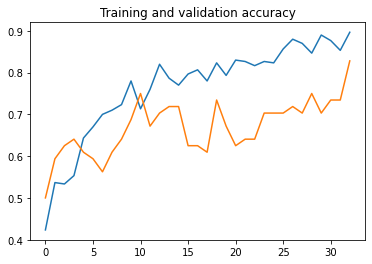

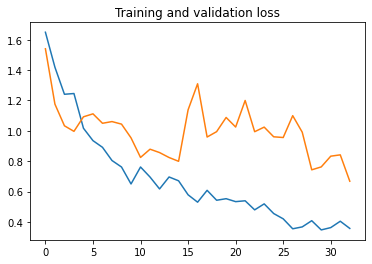

In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

def graph(history):
    acc      = history.history[     'accuracy' ]
    val_acc  = history.history[ 'val_accuracy' ]
    loss     = history.history[    'loss' ]
    val_loss = history.history['val_loss' ]
    epochs   = range(len(acc))
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.figure()
    plt.plot  ( epochs,     loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    
graph(history)


**PREDICTION**

In [26]:
from keras.preprocessing import image

import pandas as pd


def predict(model):
    with open('/kaggle/input/hackerearth-dance/dataset/test.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        i=0
        data = []
        for file in csv_reader:
            if i==0:
                i=i+1
                continue
            path = '/kaggle/hack/prediction/' + str(file[0])
            img = image.load_img(path, target_size= (IMG_WIDTH,IMG_HEIGHT))

            x = image.img_to_array(img)/255
            x = np.expand_dims(x, axis=0)
            images = np.vstack([x])
            classes = model.predict(images, batch_size=10)

            num = np.argmax(classes)

            if num==0:
                data.append([str(file[0]), 'bharatanatyam'])

            elif num==1:
                data.append([str(file[0]), 'kathak'])

            elif num==2:
                data.append([str(file[0]), 'kathakali'])


            elif num==3:
                data.append([str(file[0]),'kuchipudi'])

            elif num==4:
                data.append([str(file[0]), 'manipuri'])

            elif num==5:
                data.append([str(file[0]), 'mohiniyattam'])

            elif num == 6:
                data.append([str(file[0]), 'odissi'])

            elif num ==7:
                data.append([str(file[0]), 'sattriya'])

        df = pd.DataFrame(data, columns=['Image', 'target'])
        df.to_csv('test.csv', index=False)
        print(df)
        

Using TensorFlow backend.


In [27]:
predict(model)
    

       Image         target
0    508.jpg         odissi
1    246.jpg       sattriya
2    473.jpg         odissi
3    485.jpg         odissi
4    128.jpg  bharatanatyam
..       ...            ...
151  366.jpg       sattriya
152  226.jpg      kuchipudi
153   35.jpg         kathak
154  458.jpg         odissi
155  358.jpg       sattriya

[156 rows x 2 columns]


SAVING MODEL

In [29]:
model.save('inception_model')

****RESNET MODEL****

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model

In [ ]:
resnet_model = ResNet50(include_top = False,
                       weights = 'imagenet',
                       input_shape= (150,150,3))

In [ ]:
resnet_model.summary()

In [ ]:
for layers in resnet_model.layers:
    layers.trainable = False

In [ ]:
resnet_last = resnet_model.get_layer('conv4_block3_out').output

In [ ]:
from tensorflow.keras import layers


y = layers.Flatten()(resnet_last)

y = layers.Dense(1024, activation = 'relu')(y)

y = layers.BatchNormalization()(y)

y = layers.Dense(256, activation = 'relu')(y)

y = layers.BatchNormalization()(y)

y = layers.Dense(8, activation='softmax')(y)

In [ ]:
model = Model(resnet_model.input, y)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>=0.8 ):
            self.model.stop_training = True

callbacks = myCallback()


In [ ]:
history =model.fit(train_generator, 
                   epochs = 20,
                   verbose = 1,
                   validation_data = test_generator, callbacks=[callbacks])